In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Loading the dataset
train_data = pd.read_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/PastYearMergedBinary.csv')
test_data = pd.read_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED18Binary.csv')

In [2]:
# Printing the descriptive analysis for both training and testing dataset
print('Training Dataset\n', train_data.describe())
print('\nTest Dataset\n', test_data.describe())

Training Dataset
            WAITTIME          AGER           SEX        ARREMS   AMBTRANSFER  \
count  55548.000000  55548.000000  55548.000000  55548.000000  55548.000000   
mean       0.669907      3.106845      0.453536      0.156261      2.858033   
std        0.470251      1.477216      0.497841      0.363106      0.372426   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%        0.000000      2.000000      0.000000      0.000000      3.000000   
50%        1.000000      3.000000      0.000000      0.000000      3.000000   
75%        1.000000      4.000000      1.000000      0.000000      3.000000   
max        1.000000      6.000000      1.000000      1.000000      3.000000   

             IMMEDR     PAINSCALE      HOSPCODE       PATCODE  
count  55548.000000  55548.000000  55548.000000  55548.000000  
mean       3.649744      4.850814    117.236516     50.030748  
std        1.091816      3.061449     67.495996     32.649506  
min        1.0

In [3]:
# Excluding irrelevant variables from both training and testing dataset
train_data.drop(['HOSPCODE','PATCODE','SEX'], axis=1, inplace=True)
test_data.drop(['HOSPCODE','PATCODE','SEX'], axis=1, inplace=True)

In [4]:
# Displaying the first 5 records for both dataset before implementing XGBoost
print(train_data.head(5))
print(test_data.head(5))

   WAITTIME  AGER  ARREMS  AMBTRANSFER  IMMEDR  PAINSCALE
0       1.0   3.0     0.0          3.0     4.0       10.0
1       1.0   4.0     1.0          2.0     4.0        3.0
2       1.0   4.0     1.0          2.0     3.0        8.0
3       1.0   3.0     0.0          3.0     4.0        7.0
4       0.0   3.0     0.0          3.0     4.0        5.0
   WAITTIME  AGER  ARREMS  AMBTRANSFER  IMMEDR  PAINSCALE
0       1.0   1.0     0.0          3.0     4.0        0.0
1       1.0   1.0     0.0          3.0     4.0        6.0
2       1.0   1.0     0.0          3.0     4.0        4.0
3       1.0   2.0     0.0          3.0     4.0       10.0
4       1.0   3.0     0.0          3.0     4.0       10.0


In [5]:
# Determining the target variable
train_x = train_data.drop(columns=['WAITTIME'], axis=1)
train_y = train_data['WAITTIME']

test_x = test_data.drop(columns=['WAITTIME'], axis=1)
test_y = test_data['WAITTIME']

In [6]:
# Initiating the XGBoost model for classification
model = XGBClassifier(learning_rate=0.05,
                      n_estimators=5000,
                      max_depth=6,
                      min_child_weight=3,
                      gamma=0,
                      subsample=0.8,
                      colsample_bytree=0.8,
                      scale_pos_weight=1,
                      tree_method='hist',
                      seed=20,
                      eval_metric='auc',
                      use_label_encoder=False)

# Fitting the training dataset onto the model
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=20, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=20, subsample=0.8, tree_method='hist',
              use_label_encoder=False, validate_parameters=1, ...)

In [7]:
# Using the data from the training dataset to train and predict the accuracy for training dataset
predict_train = model.predict(train_x)
print('\nTarget on train data', predict_train)

accuracy_train = accuracy_score(train_y, predict_train)
print('\nAccuracy score on train dataset: ', accuracy_train)


Target on train data [1 1 1 ... 1 1 0]

Accuracy score on train dataset:  0.677198098941456


In [8]:
# Using the data from the training dataset to train and predict the accuracy for the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data', predict_test)

accuracy_test = accuracy_score(test_y, predict_test)
print('\nAccuracy score on test dataset: ', accuracy_test)


Target on test data [1 1 1 ... 1 1 1]

Accuracy score on test dataset:  0.6459696646882768


In [11]:
cm = confusion_matrix(test_y, predict_test)

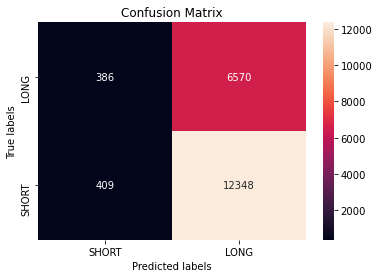

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['SHORT', 'LONG']); ax.yaxis.set_ticklabels(['LONG', 'SHORT']);